# CAMPUS PLACEMENT PREDICTION

Description: Campus placement data comprises information about students, their academic performance, skills, internships, and their eventual placement outcomes. The objective is to extract valuable insights from this data to understand factors influencing placement success and develop strategies for improving the placement process by identifying patterns and trends in campus placement data using machine learning techniques

# Installing Packages

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
%matplotlib inline

# Data Exploration

In [3]:
df=pd.read_csv(r"C:\Users\Varshini\Desktop\Placement_Data_Full_Class2.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,Internships,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,8,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,7,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,6,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,8,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,8,Placed,425000.0


# Features 
sl_no - Serial Number

gender - Gender

ssc_p - Secondary Eduacation Percent - 10th Grade

scc_b - Board of Secondary Education - central/ others

hsc_p - Higher Secondary Education Percent - 12th Grade

hsc_b - Board Of Higher Eduation - Central/ Others

hsc_s - Specialization in Higher Secondary Education

degree_p - Degree Percent

degree_t - Under Graduation(Degree type) Field of degree education

workex - Work Experience

etest_p - Employability test Percent (conducted by college)

specialisation - Post Graduation(MBA) Specialization-----Marketing&HR ,Marketing&Finance

mba_p - MBA percentage

internships- no.of internships done

status - Status of Placement (Placed/Not Placed)

salary - Salary Offered By corporate to candidates

In [5]:
print(f"Shape of Data frame is: {df.shape}")

Shape of Data frame is: (215, 16)


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
Internships        0
status             0
salary            67
dtype: int64

In [7]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
Internships         int64
status             object
salary            float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  Internships     215 non-null    int64  
 14  status          215 non-null    object 
 15  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(8)
memory usage: 27.0+ KB


In [9]:
df.select_dtypes(include='object').nunique()


gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [10]:
# Drop sl_no column because its only identifier column
df.drop(columns='sl_no', inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,Internships,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,8,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,7,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,6,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,8,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,8,Placed,425000.0


In [11]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Internships,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,6.739535,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,1.126184,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,5.000000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,6.000000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,7.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,8.000000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,9.000000,940000.000000


# Data Visualization

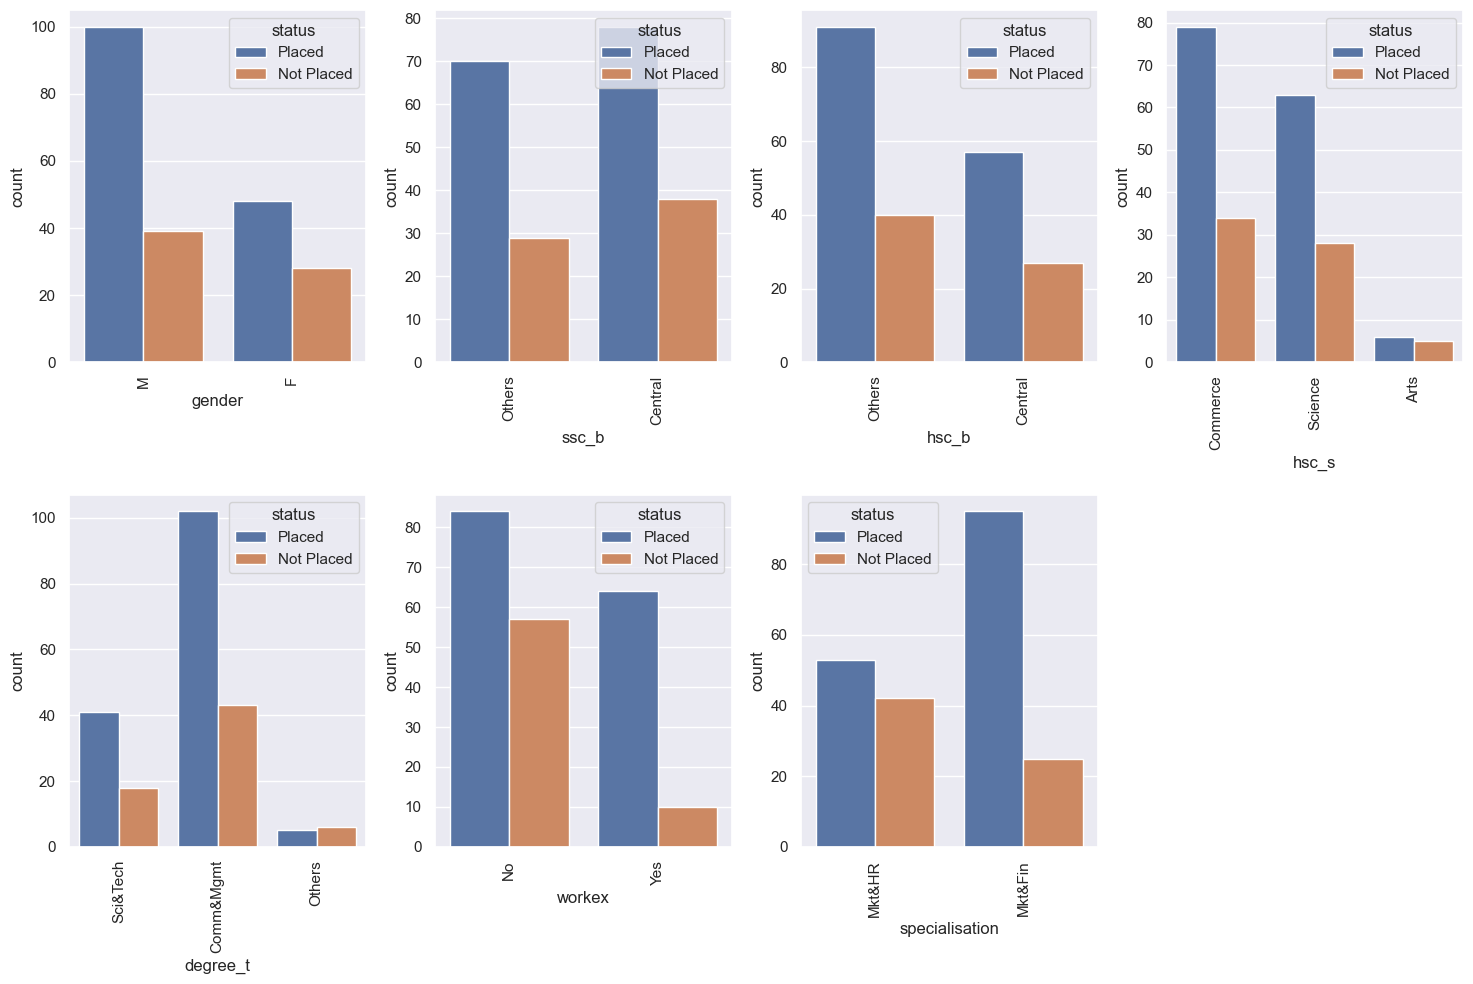

In [12]:
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='status', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

# Insights of dependent variables on target variable

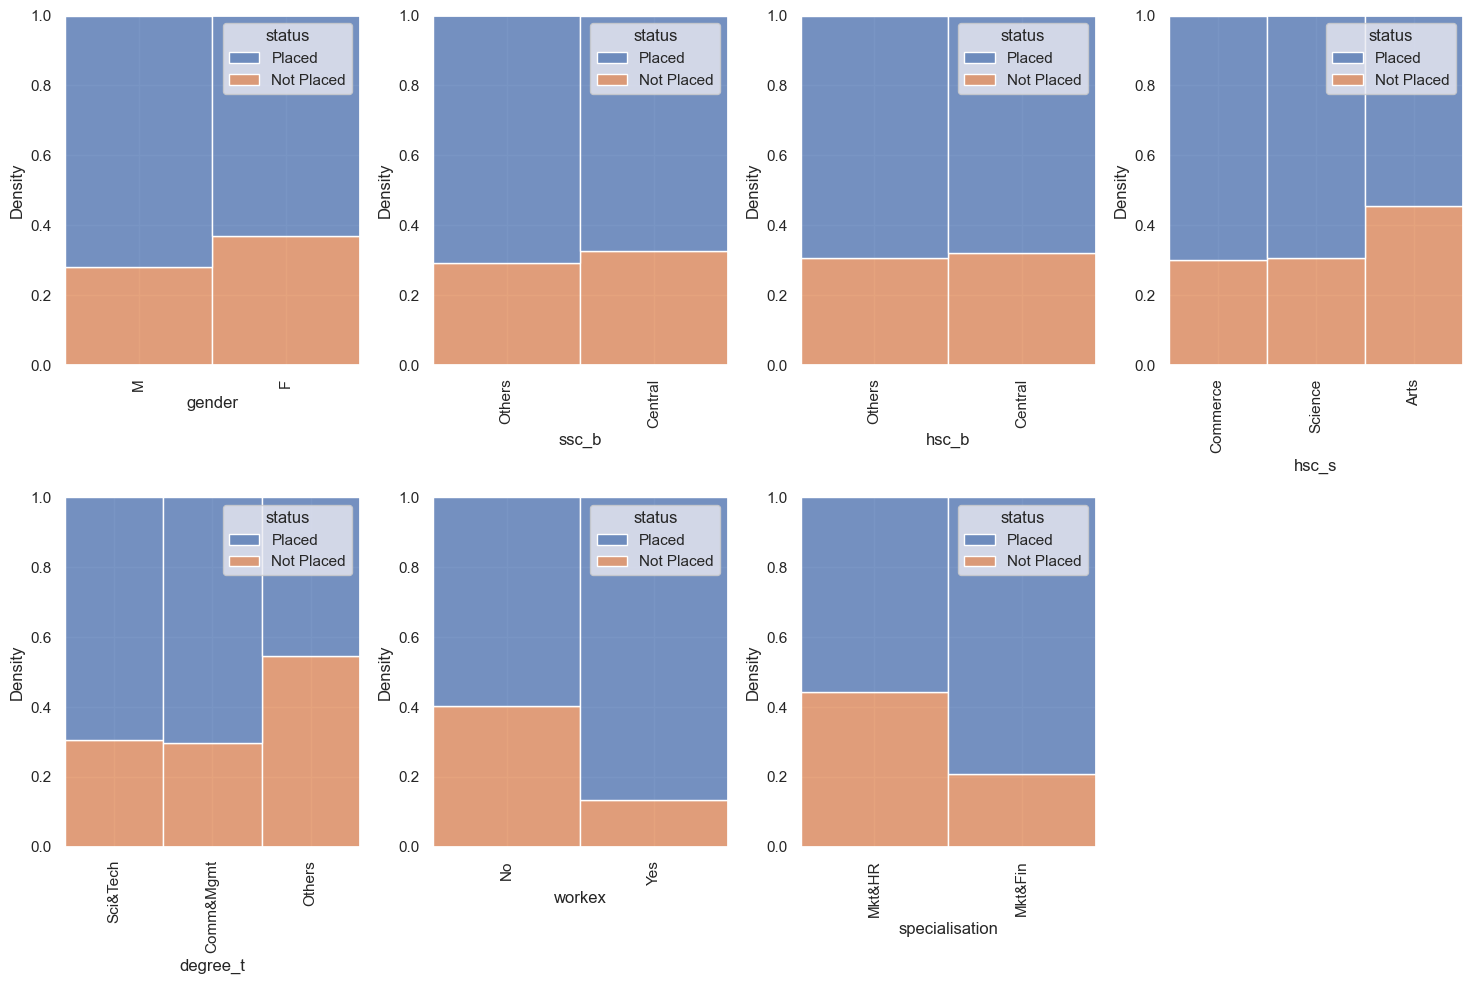

In [13]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='status', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])
plt.show()

# Distribution of features

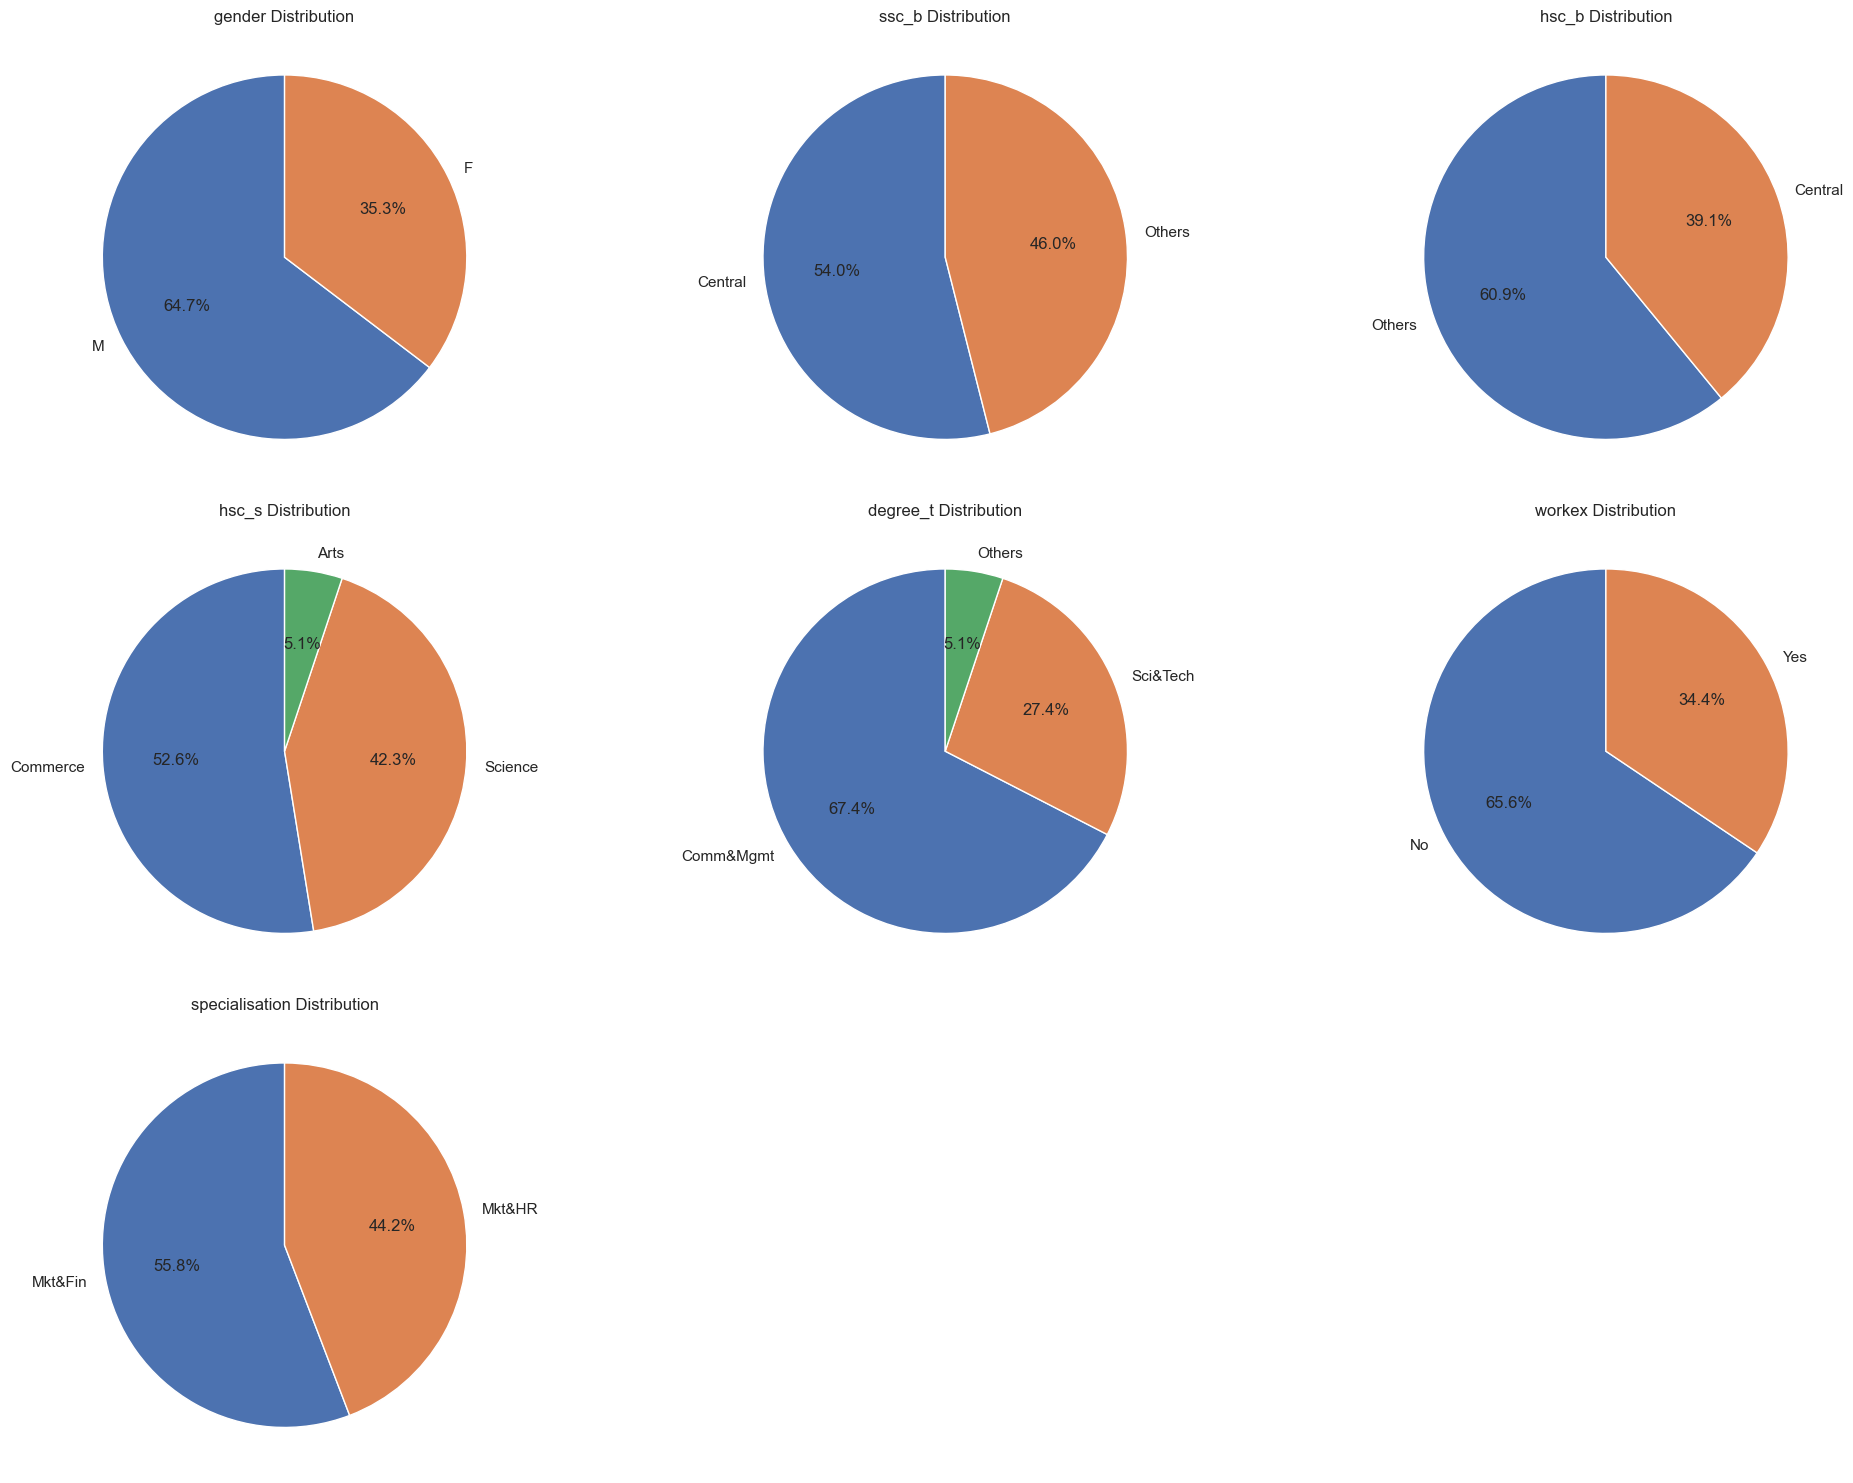

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# remove the eighth and ninth subplot
fig.delaxes(axs[2, 2])  # 2 represents the row index, and 2 represents the column index
fig.delaxes(axs[2, 1])  # 2 represents the row index, and 1 represents the column index

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

# Boxplots

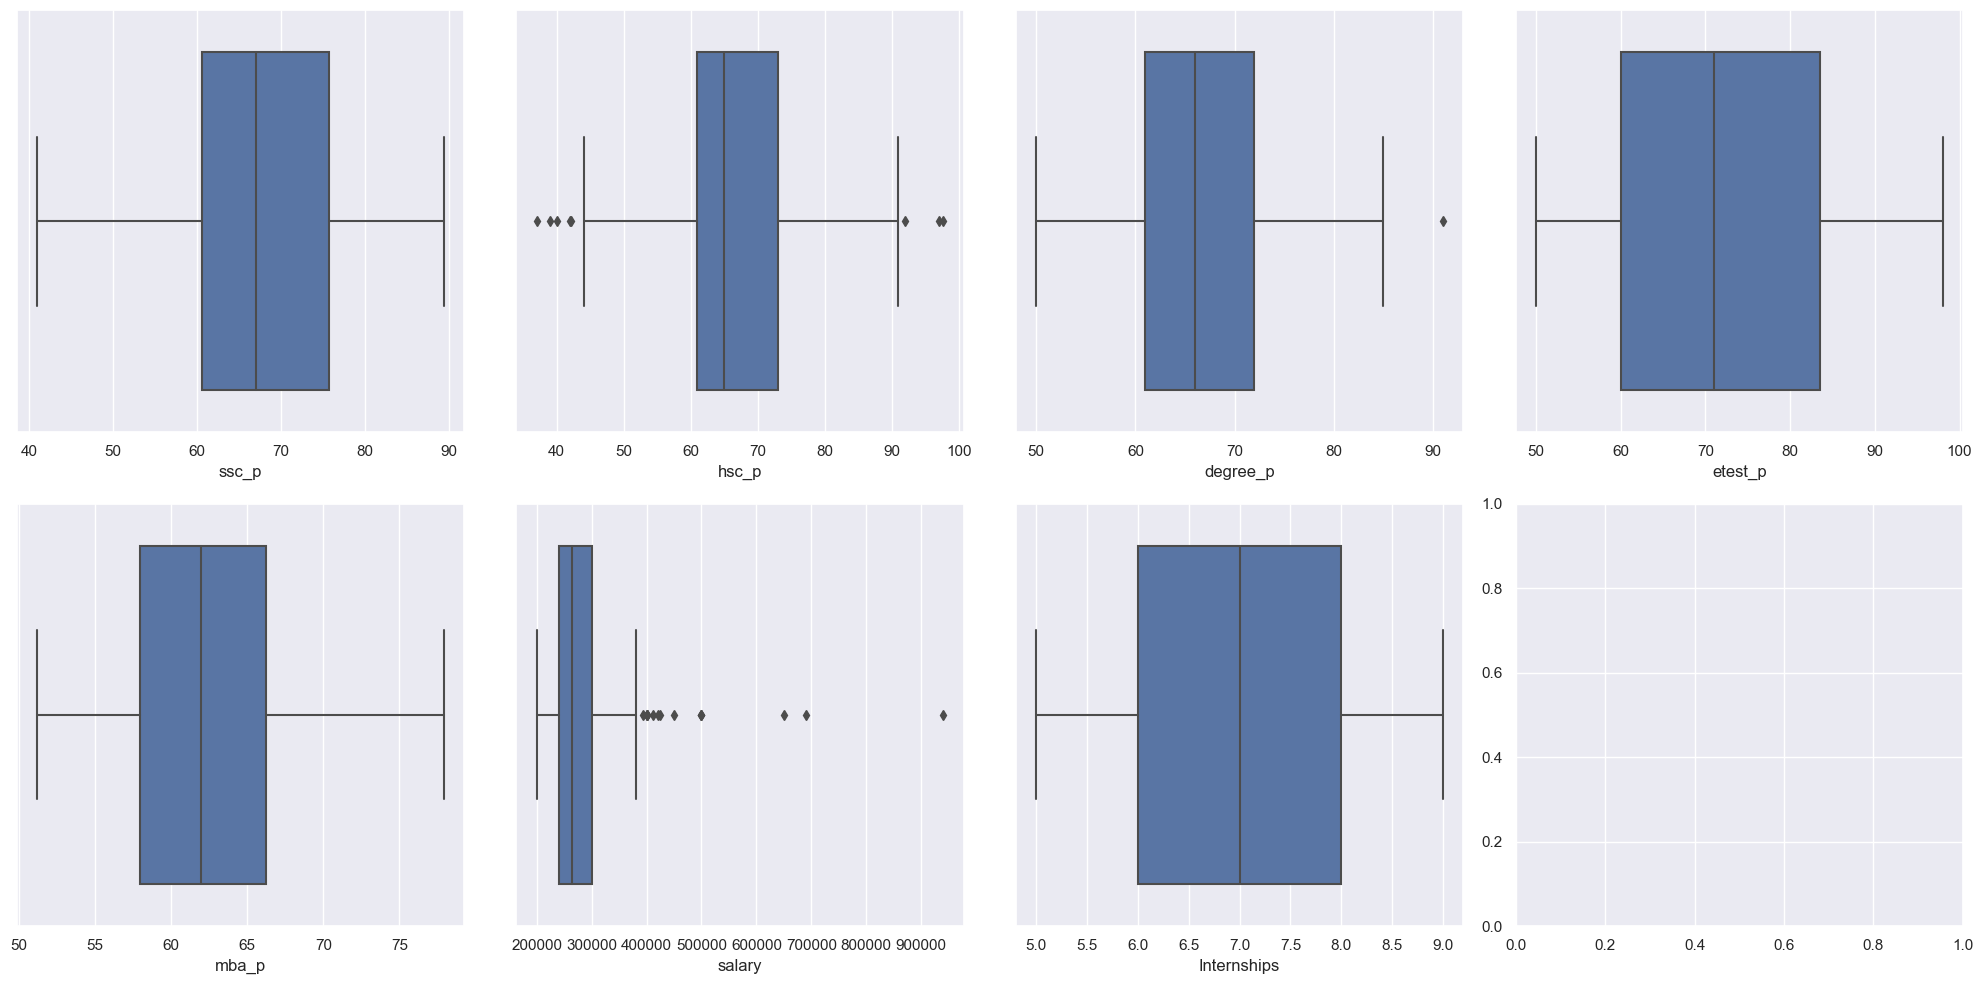

In [15]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary','Internships']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

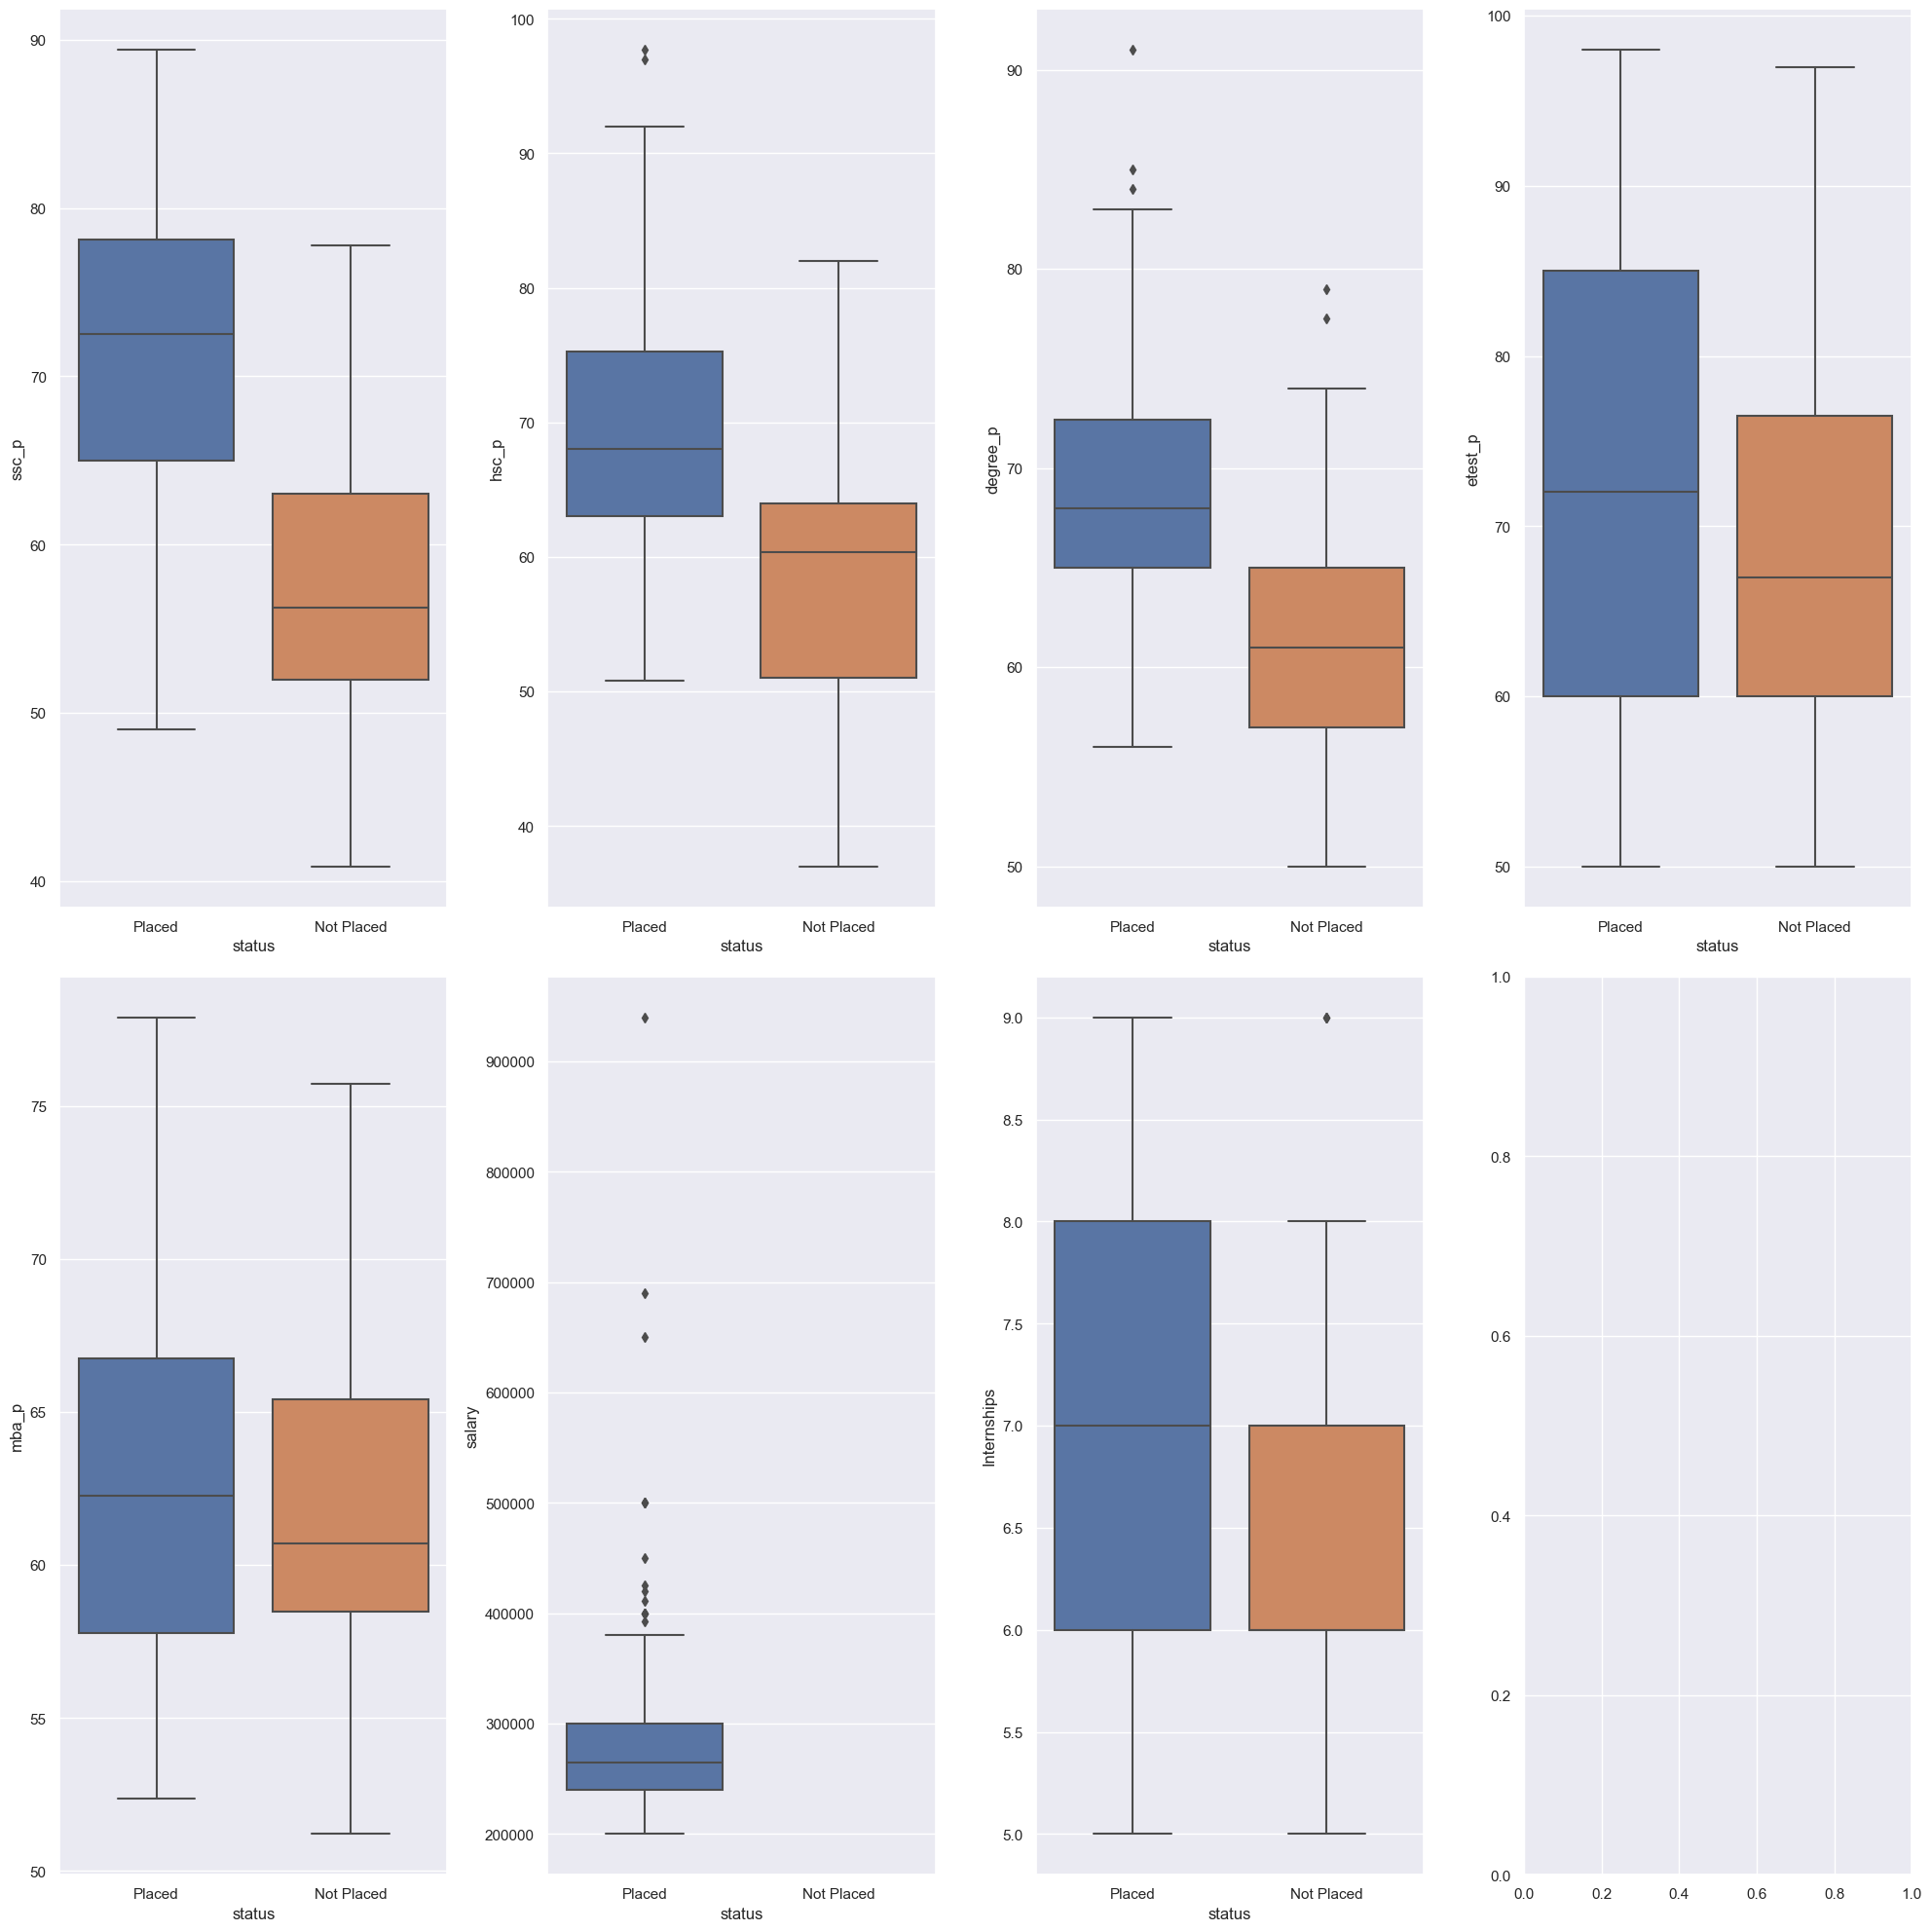

In [16]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary','Internships']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='status', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

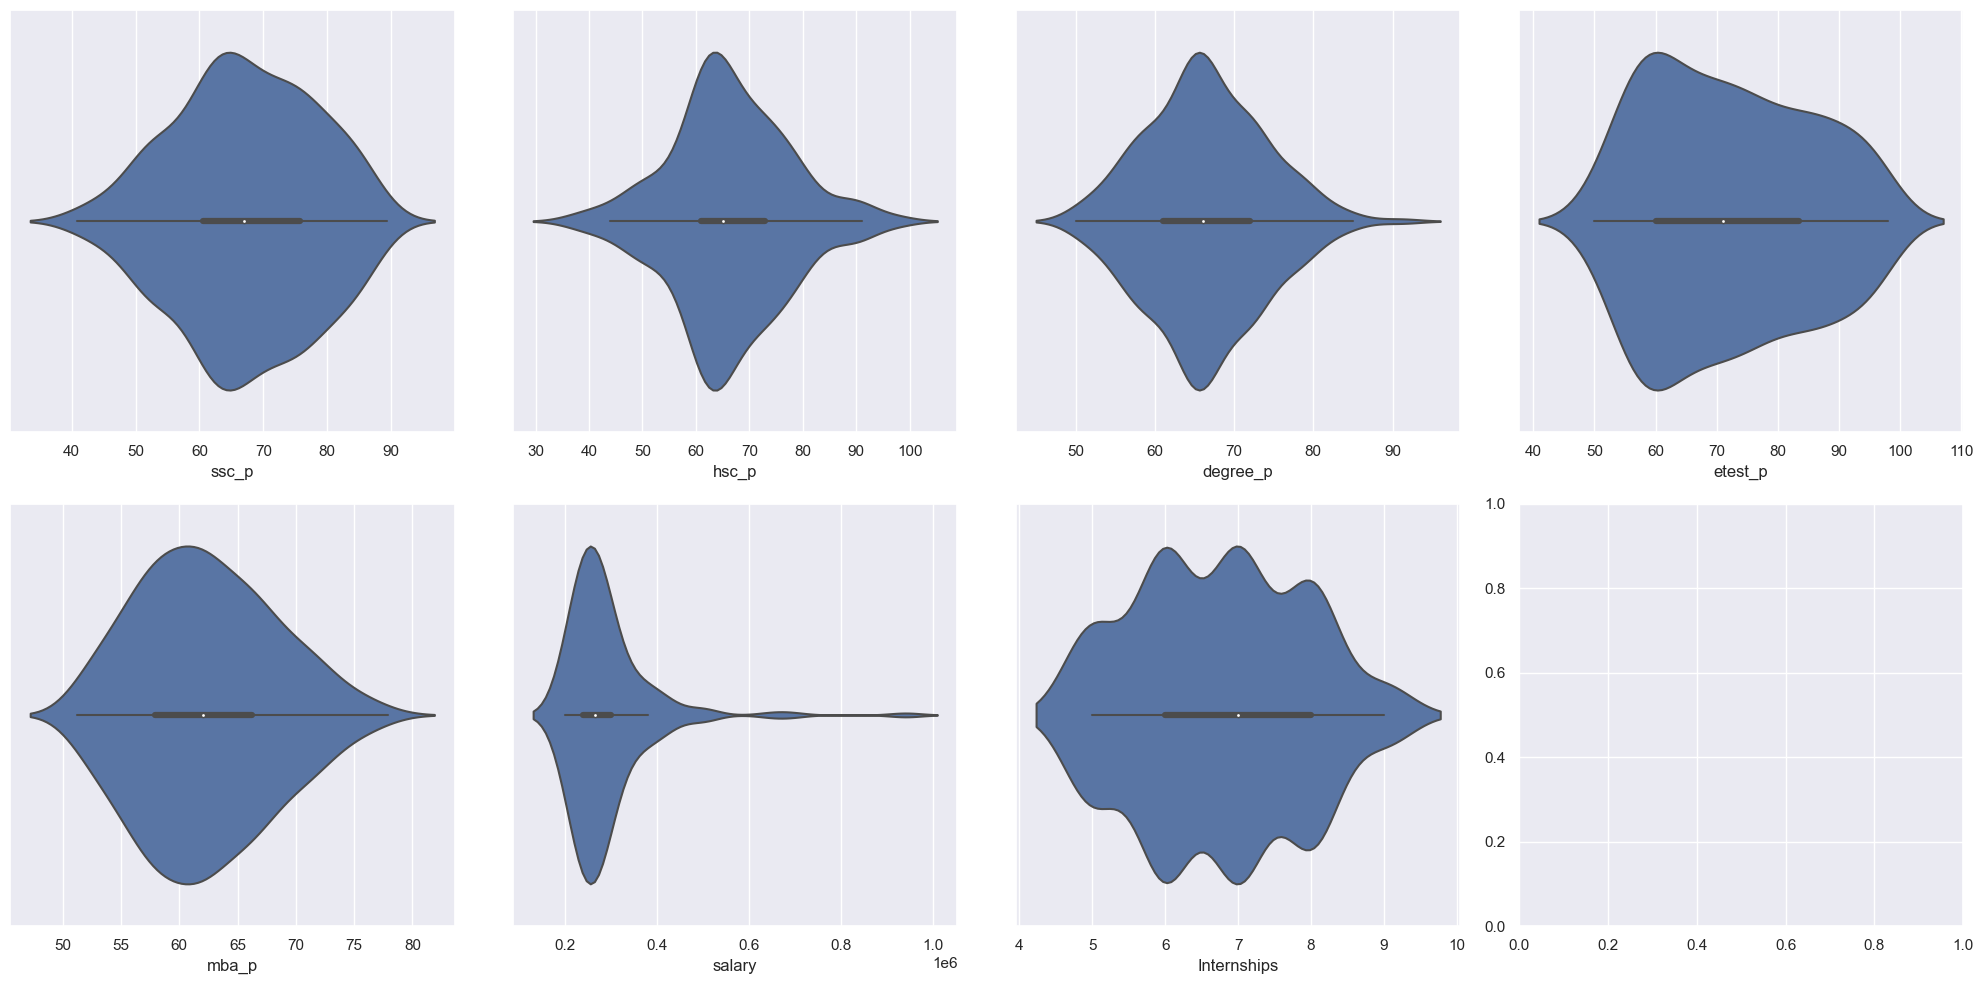

In [17]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary','Internships']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

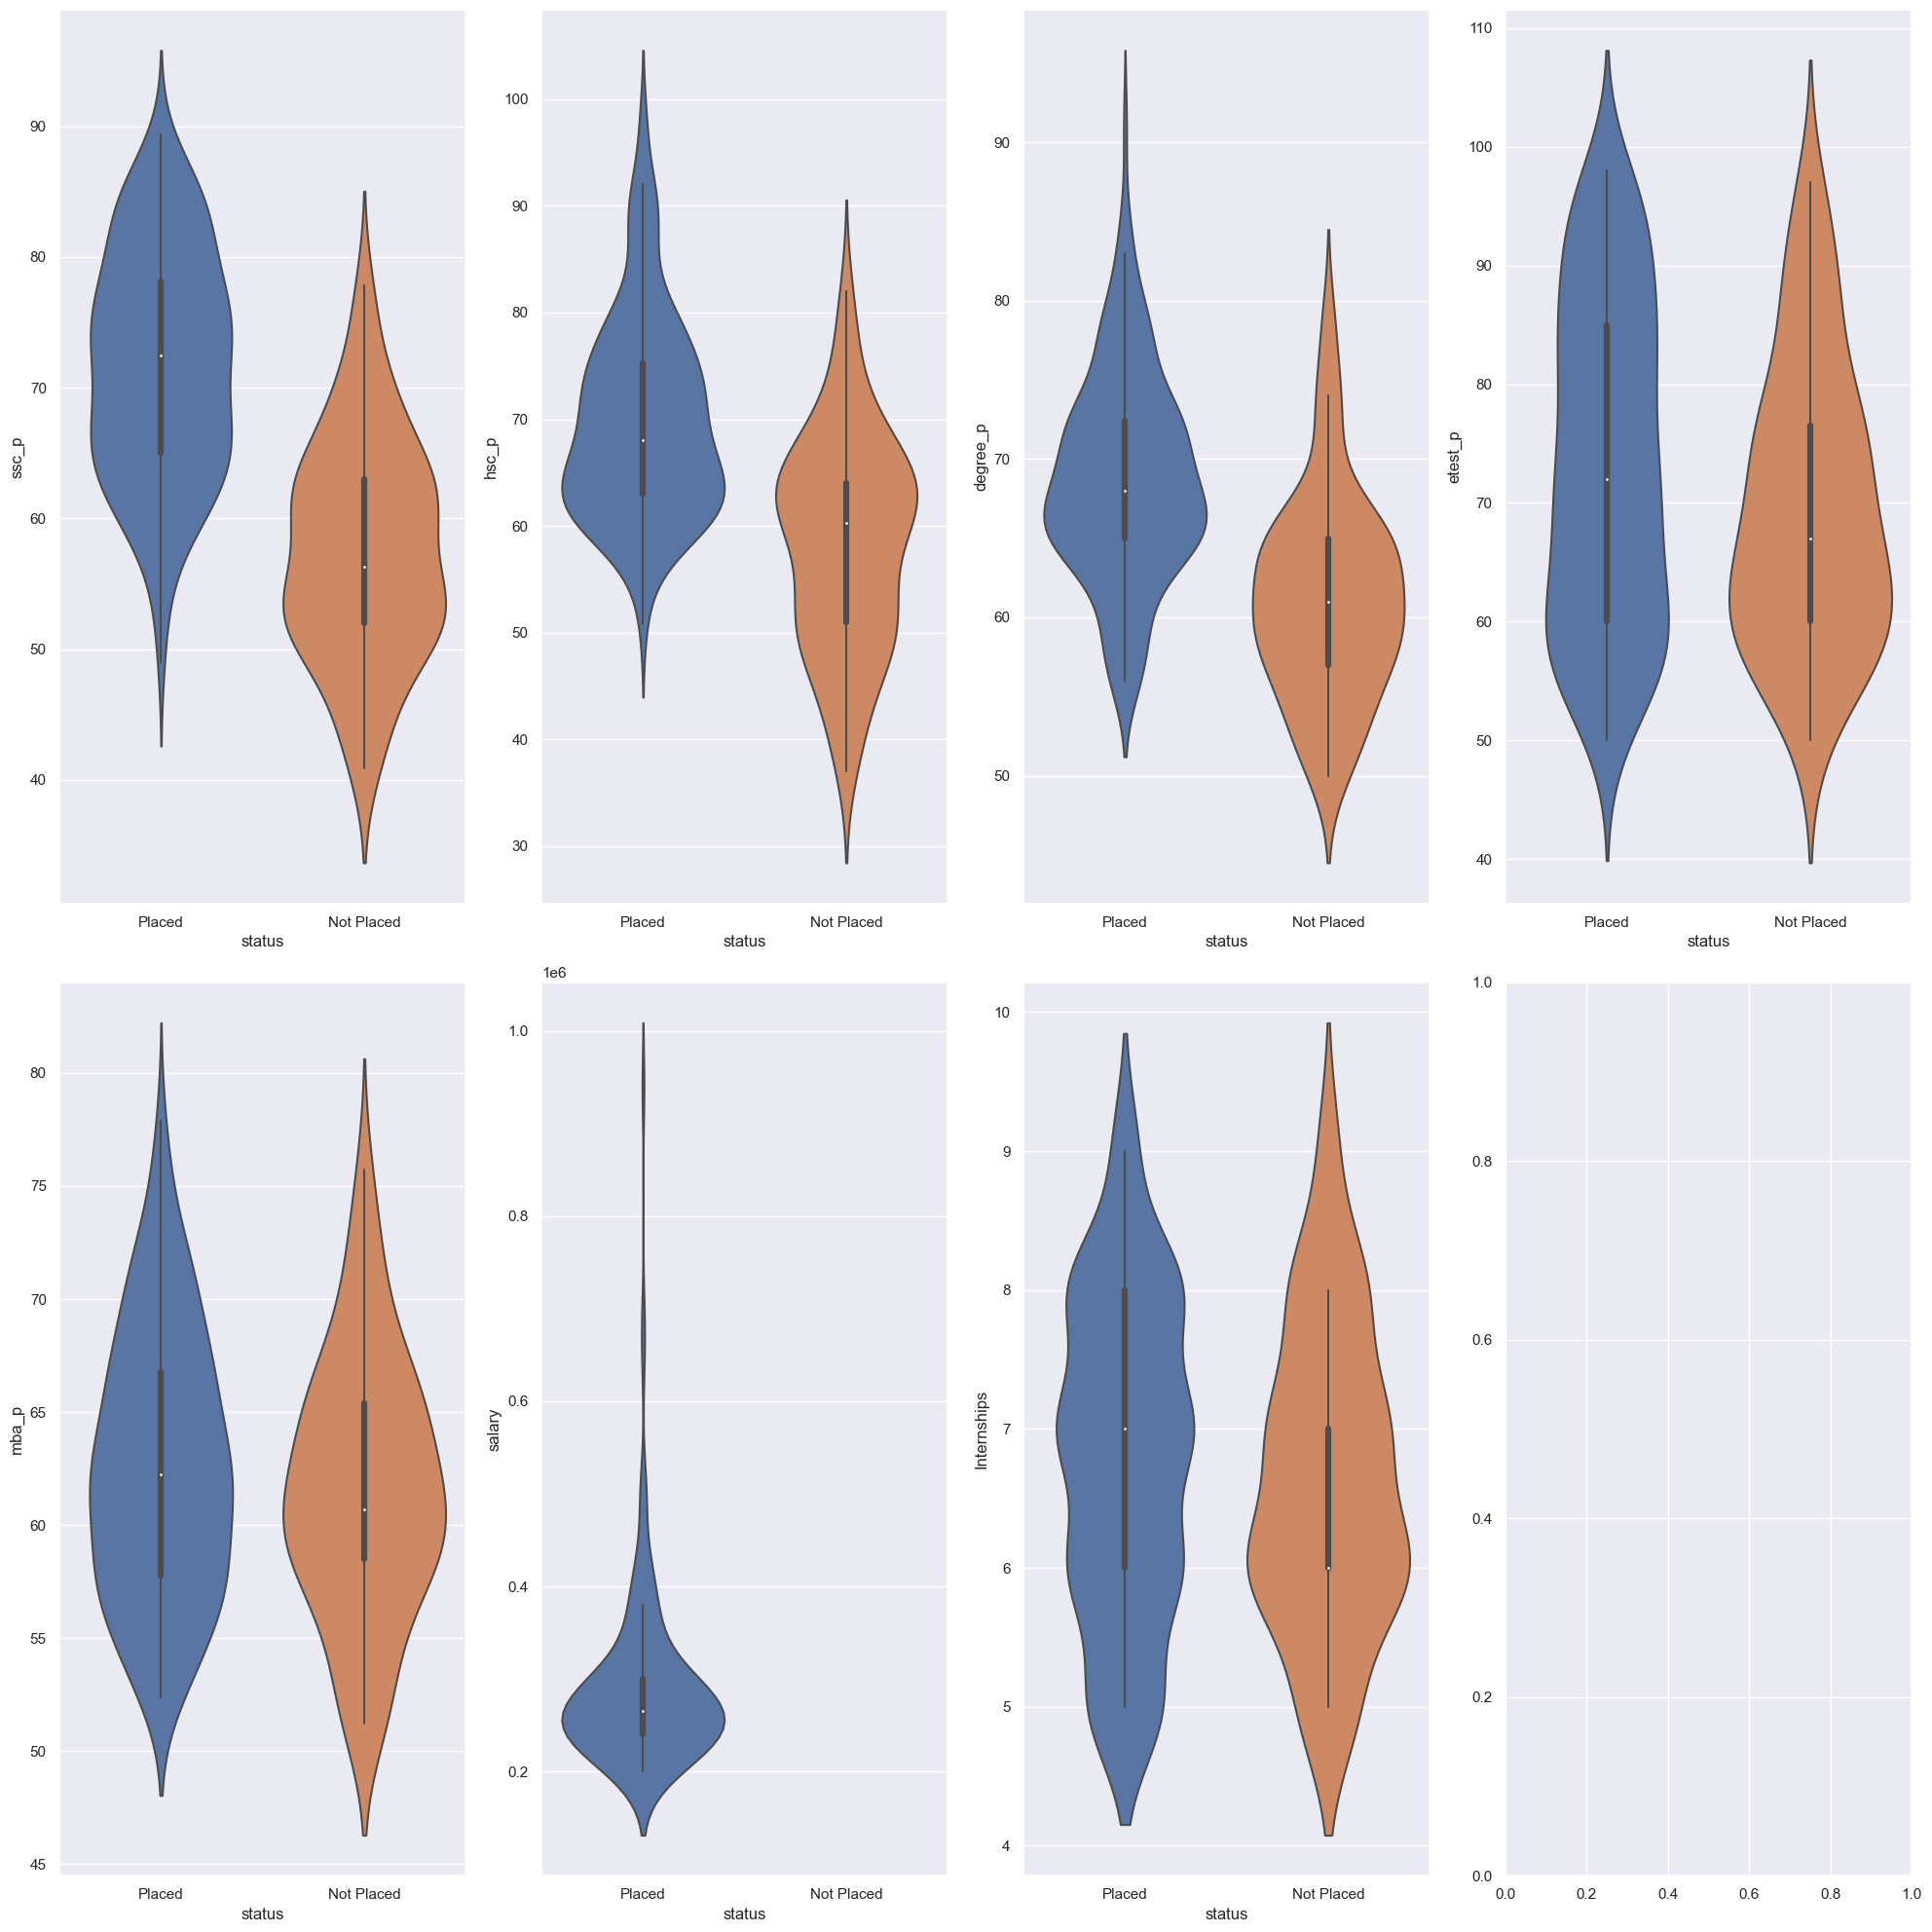

In [18]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary','Internships']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='status', ax=axs[i])

fig.tight_layout()

plt.show()

In [19]:
def data_stats(df, query_col, target_col, aggregation_func=np.mean, columns_list=None):
    """
    functions describe the basic stats (count, probability) groupby operations based on query column on target column
    """
    print(f"Total placed based on {query_col} \n")
    print(pd.crosstab(df[query_col], df[target_col], margins="True"))
    print("=" * 50)
    print(f"Proportion of placed student based on {query_col} \n")
    print(
        pd.pivot_table(
            data=df,
            index=query_col,
            values=target_col,
            aggfunc=aggregation_func,
            columns=columns_list,
            sort=True,
        )
    )

# Strategies to improve placement process

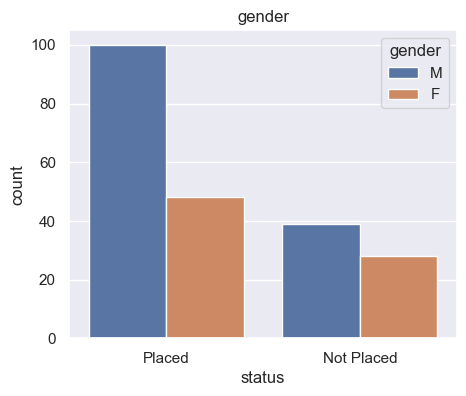

Total placed based on gender 

status  Not Placed  Placed  All
gender                         
F               28      48   76
M               39     100  139
All             67     148  215
Proportion of placed student based on gender 

Empty DataFrame
Columns: []
Index: [F, M]


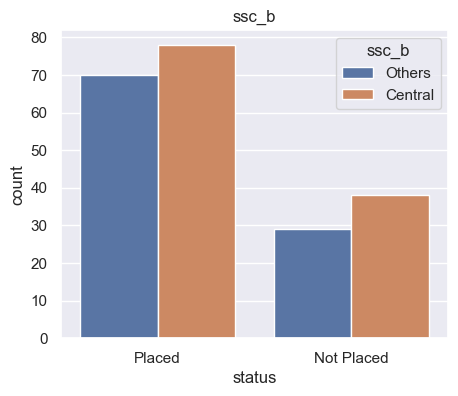

Total placed based on ssc_b 

status   Not Placed  Placed  All
ssc_b                           
Central          38      78  116
Others           29      70   99
All              67     148  215
Proportion of placed student based on ssc_b 

Empty DataFrame
Columns: []
Index: [Central, Others]


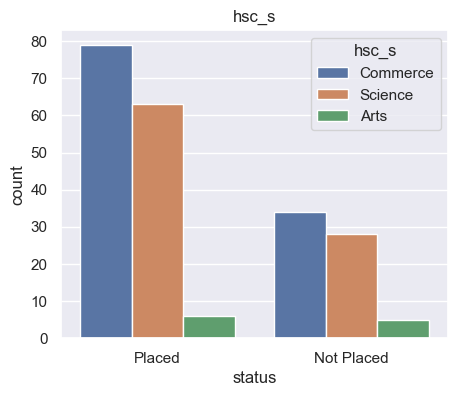

Total placed based on hsc_s 

status    Not Placed  Placed  All
hsc_s                            
Arts               5       6   11
Commerce          34      79  113
Science           28      63   91
All               67     148  215
Proportion of placed student based on hsc_s 

Empty DataFrame
Columns: []
Index: [Arts, Commerce, Science]


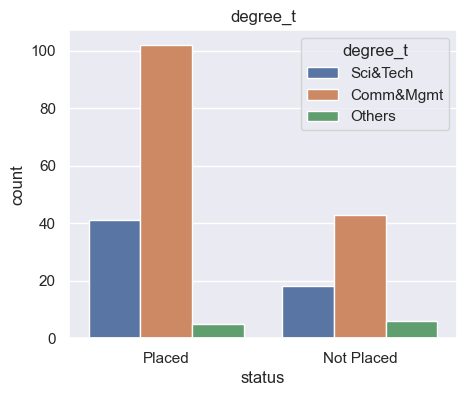

Total placed based on degree_t 

status     Not Placed  Placed  All
degree_t                          
Comm&Mgmt          43     102  145
Others              6       5   11
Sci&Tech           18      41   59
All                67     148  215
Proportion of placed student based on degree_t 

Empty DataFrame
Columns: []
Index: [Comm&Mgmt, Others, Sci&Tech]


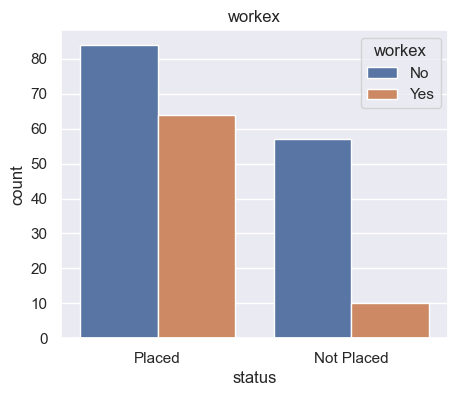

Total placed based on workex 

status  Not Placed  Placed  All
workex                         
No              57      84  141
Yes             10      64   74
All             67     148  215
Proportion of placed student based on workex 

Empty DataFrame
Columns: []
Index: [No, Yes]


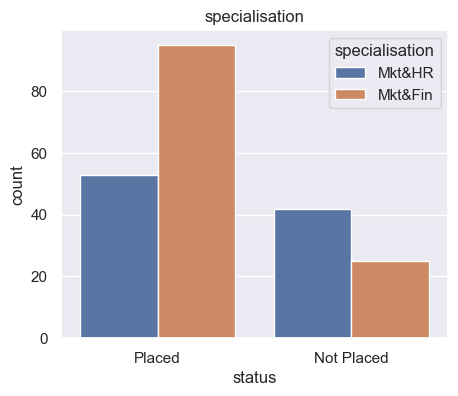

Total placed based on specialisation 

status          Not Placed  Placed  All
specialisation                         
Mkt&Fin                 25      95  120
Mkt&HR                  42      53   95
All                     67     148  215
Proportion of placed student based on specialisation 

Empty DataFrame
Columns: []
Index: [Mkt&Fin, Mkt&HR]


In [20]:
col_list = ["gender", "ssc_b", "hsc_s", "degree_t", "workex", "specialisation"]
for g in col_list:
    plt.figure(figsize=(5, 4))
    sns.countplot(
        data=df,
        x="status",
        hue=g,
    )
    plt.title(f"{g}")
    plt.show()
    data_stats(df, g, "status")

<Figure size 640x480 with 0 Axes>

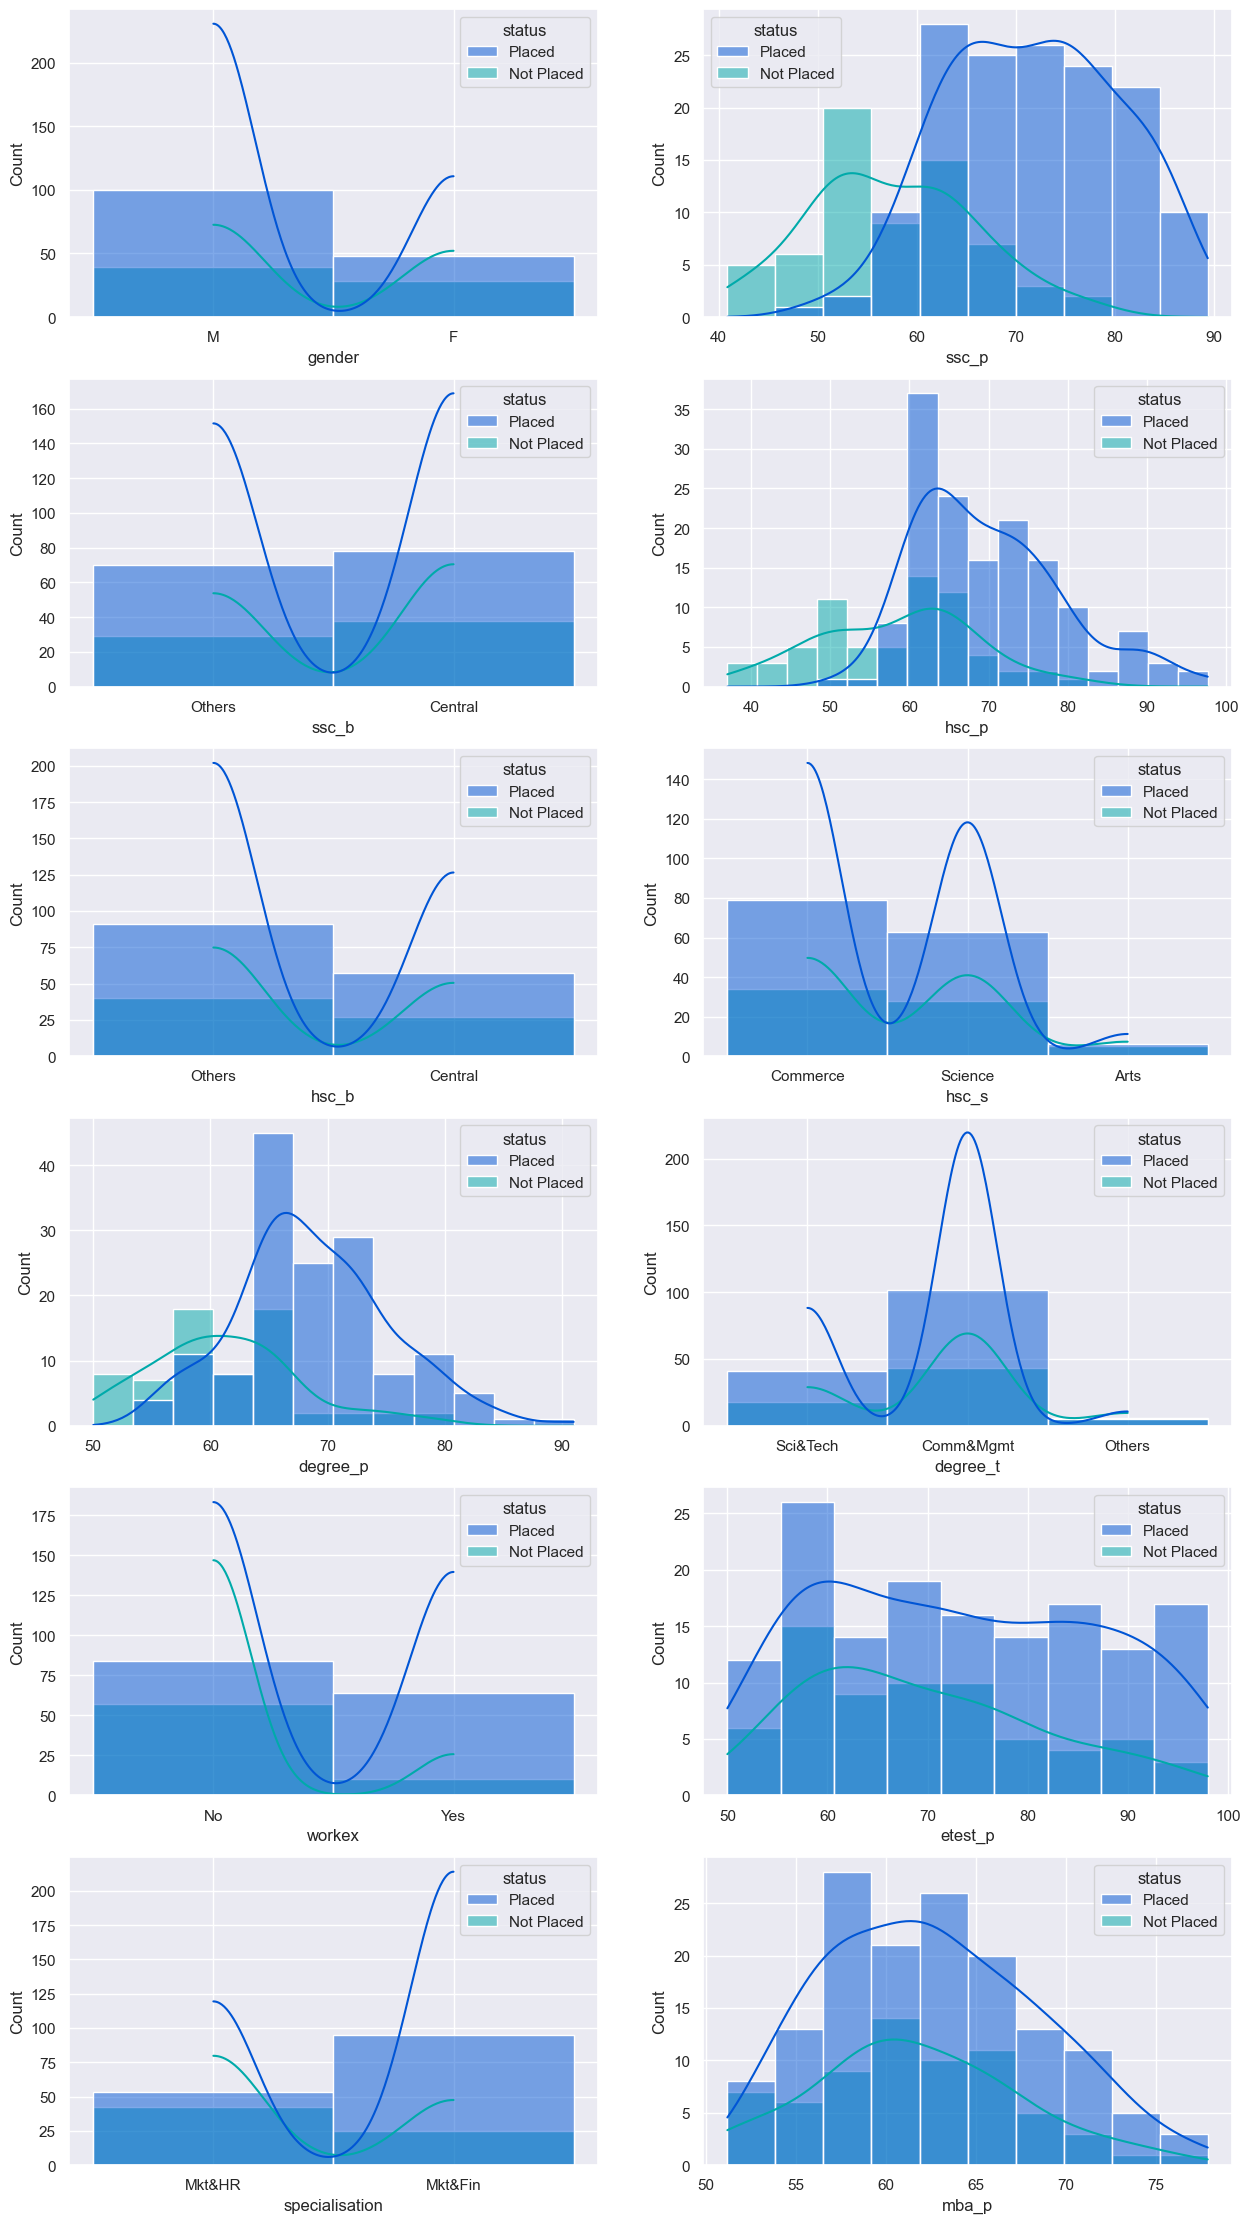

In [21]:
plt.subplots_adjust(hspace=0.2)
color = "winter"

fig, axs = plt.subplots(6, 2, figsize=(15, 28))
i = 1
for feature in df.columns:
    if feature not in ["status"] and i < 13:
        plt.subplot(6, 2, i)
        sns.histplot(data=df, x=feature, kde=True, palette=color, hue="status")
        i += 1

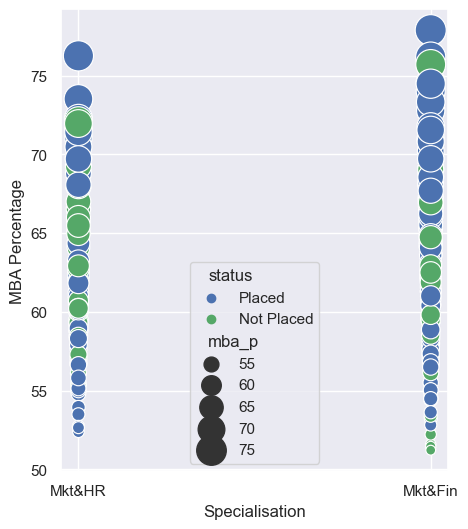

In [22]:
plt.figure(figsize=(5, 6))
colors = ["b", "g"]
sns.scatterplot(
    data=df,
    x="specialisation",
    y="mba_p",
    hue="status",
    palette=colors,
    size="mba_p",
    sizes=(50, 500),
)

plt.xlabel("Specialisation", fontsize=12)
plt.ylabel("MBA Percentage", fontsize=12)
plt.show()

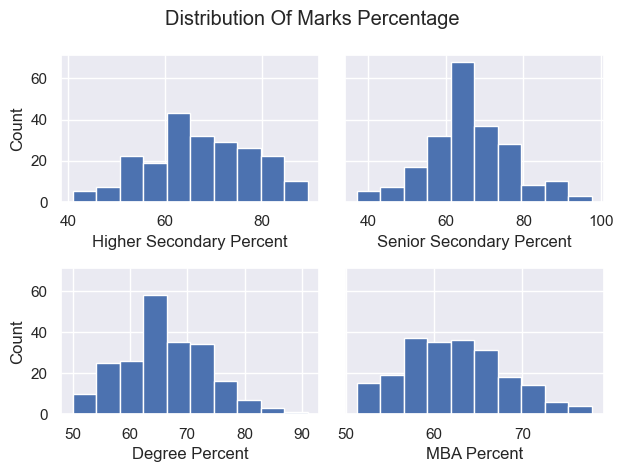

In [23]:
fig, ax = plt.subplots(2, 2, sharey=True)
ax[0, 0].hist(df.ssc_p, bins=10)
ax[0, 1].hist(df.hsc_p, bins=10)
ax[1, 0].hist(df.degree_p, bins=10)
ax[1, 1].hist(df.mba_p, bins=10)

ax[0, 0].set_ylabel("Count")
ax[1, 0].set_ylabel("Count")
ax[0, 0].set_xlabel("Higher Secondary Percent")
ax[0, 1].set_xlabel("Senior Secondary Percent")
ax[1, 0].set_xlabel("Degree Percent")
ax[1, 1].set_xlabel("MBA Percent")
fig.suptitle("Distribution Of Marks Percentage")
plt.tight_layout()
plt.show()

In [24]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,Internships,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,8,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,7,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,6,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,8,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,8,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,8,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,7,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,6,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,8,Placed,204000.0


# Data Preprocessing

In [25]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

salary    31.162791
dtype: float64

In [26]:
df.shape

(215, 15)

In [27]:
# fill null value in 'salary' column with median because the outlier is pretty ba
df['salary'] = df['salary'].fillna(df['salary'].median())
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,Internships,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,8,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,7,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,6,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,8,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,8,Placed,425000.0


In [28]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [29]:
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [30]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

gender: [1 0]
ssc_b: [1 0]
hsc_b: [1 0]
hsc_s: [1 2 0]
degree_t: [2 0 1]
workex: [0 1]
specialisation: [1 0]
status: [1 0]


# Heatmap

<AxesSubplot:>

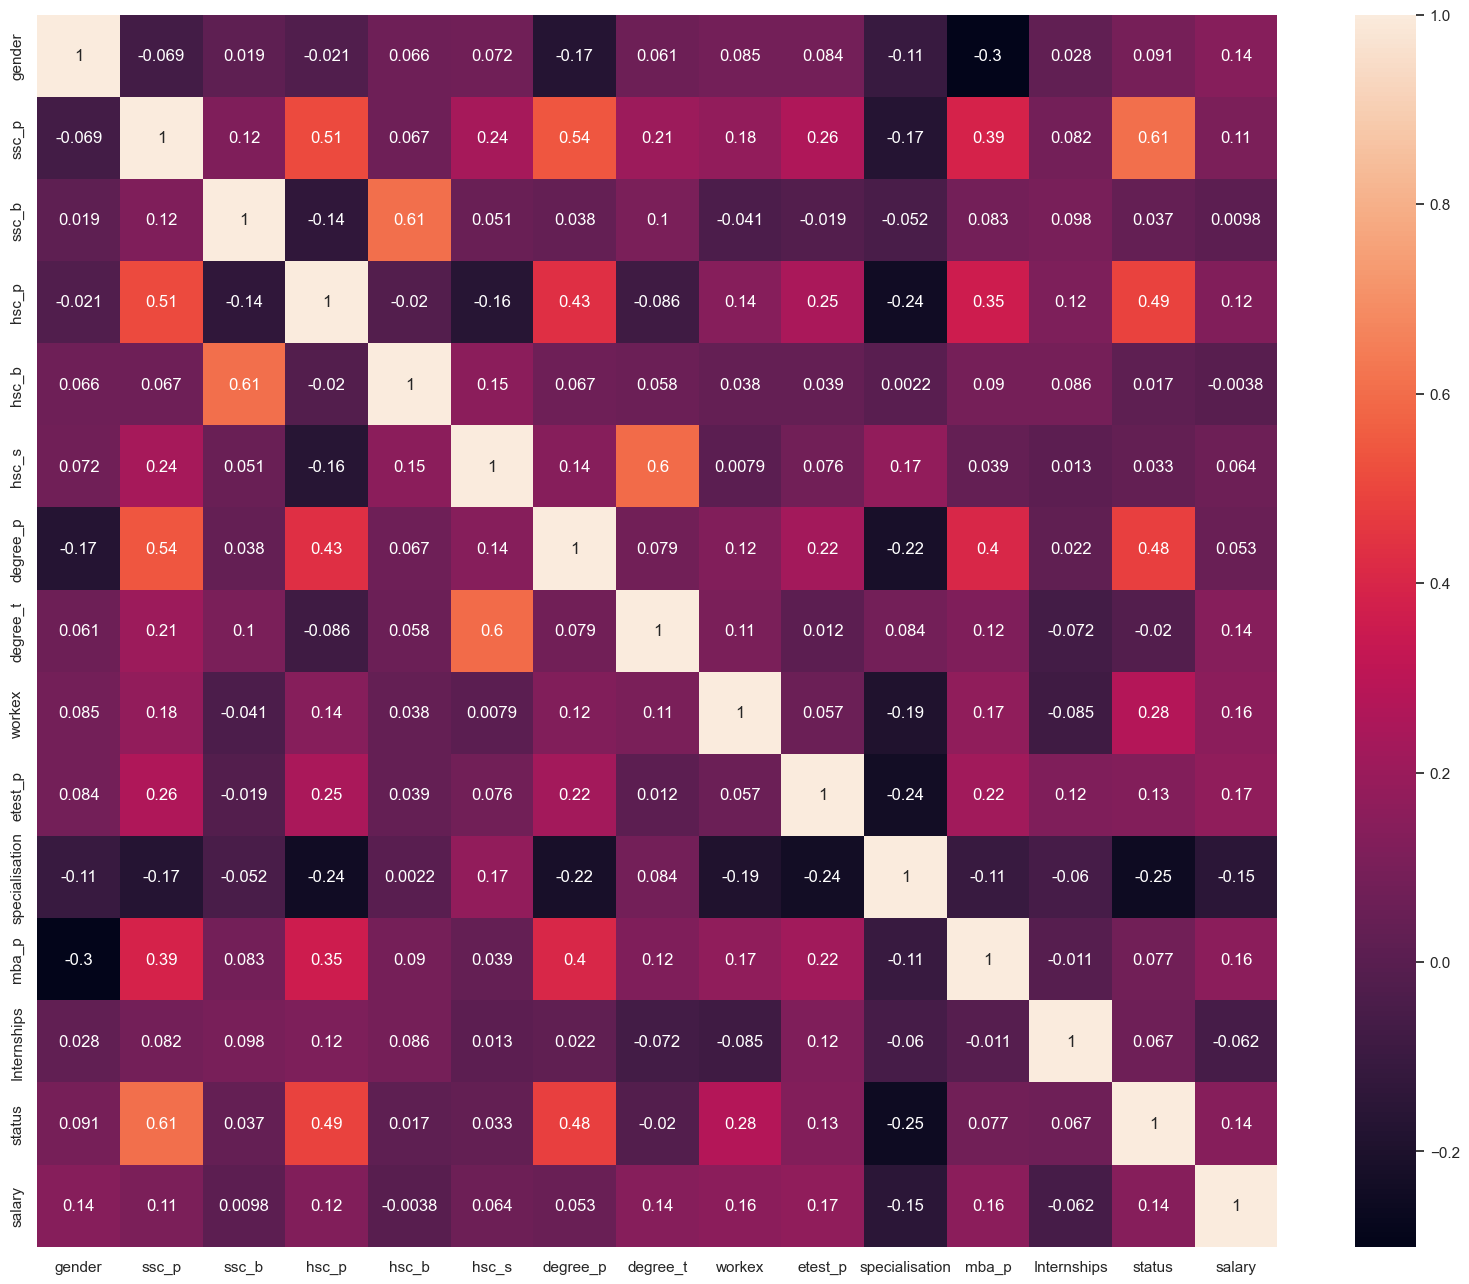

In [31]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Model Development

In [47]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop('status',axis=1)
y = df["status"]

In [49]:
categorical_features = [d for d in X.columns if X[d].dtype == "object"]
numeric_features = [d for d in X.columns if X[d].dtype != "object"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [51]:
X_train.shape, X_test.shape

((172, 14), (43, 14))

# Recognizing Outliers

In [52]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['hsc_p', 'degree_p', 'salary']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [53]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[("preprocessing", preprocessor)])


In [54]:
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [55]:
X_processed = pipeline.fit_transform(X)

# RandomForest Classifier

In [56]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_processed, y_train)
y_pred = forest.predict(X_test_processed)

In [57]:
print(f"Accuracy of Random Forest Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(
    f"Precision of Random Forest Model is : {metrics.precision_score(y_test, y_pred)}"
)
print(f"Recall of Random Forest Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of Random Forest Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of Random Forest Model is : 0.8837209302325582
Precision of Random Forest Model is : 0.8928571428571429
Recall of Random Forest Model is : 0.9259259259259259
f1_score of Random Forest Model is : 0.9090909090909091


In [58]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[13  3]
 [ 2 25]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.89      0.93      0.91        27

    accuracy                           0.88        43
   macro avg       0.88      0.87      0.87        43
weighted avg       0.88      0.88      0.88        43



In [59]:
cv_scores = cross_val_score(forest, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[1.         0.97692308 1.         0.98275862 0.99261084]


# GridSearchCV

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [62]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(metrics.accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.02 %


In [63]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9302325581395349
Precision Score :  0.9302325581395349
Recall Score :  0.9302325581395349
Jaccard Score :  0.8695652173913043
Log Loss :  2.4097378599307597


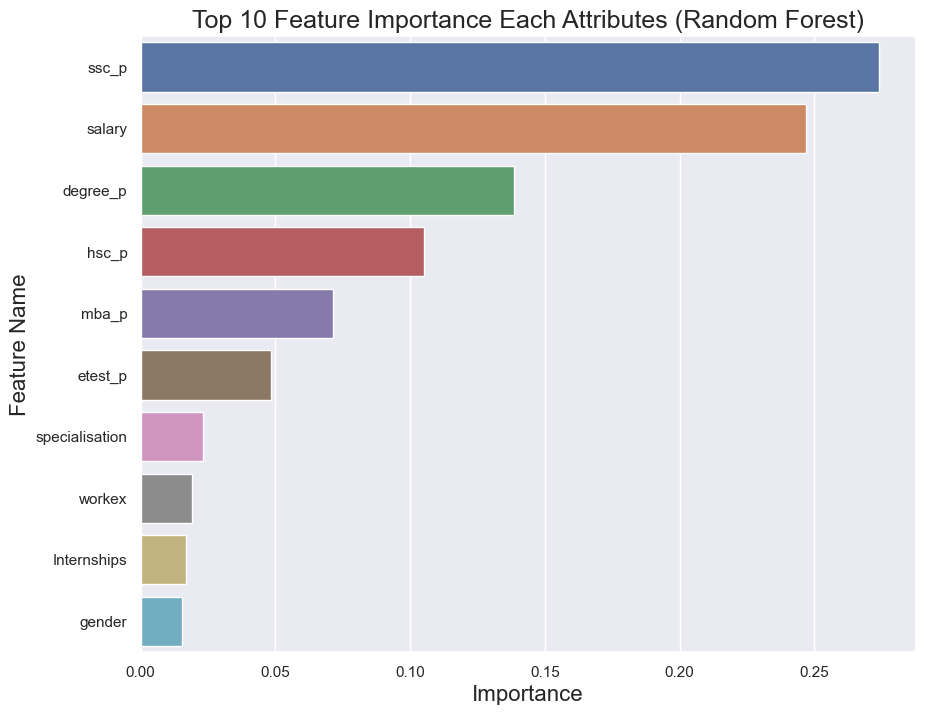

In [64]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

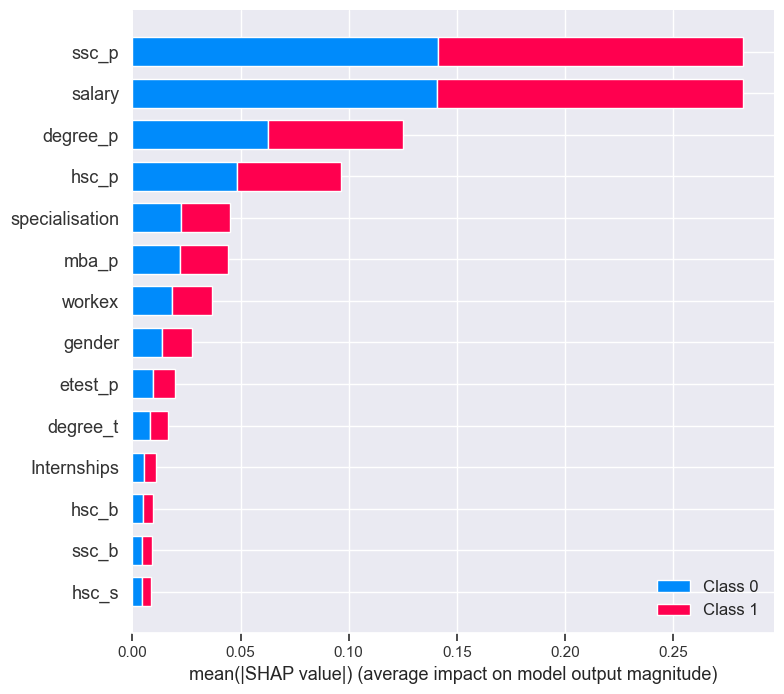

In [65]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

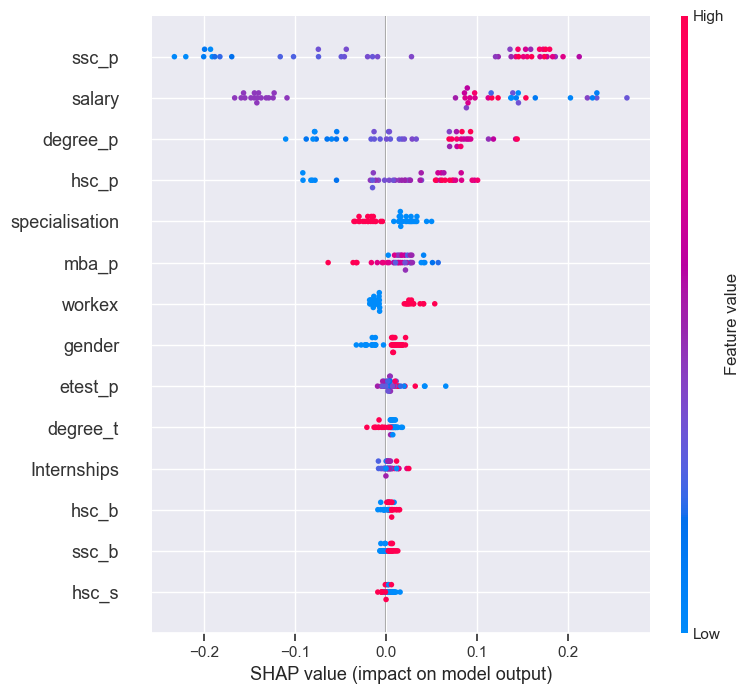

In [66]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

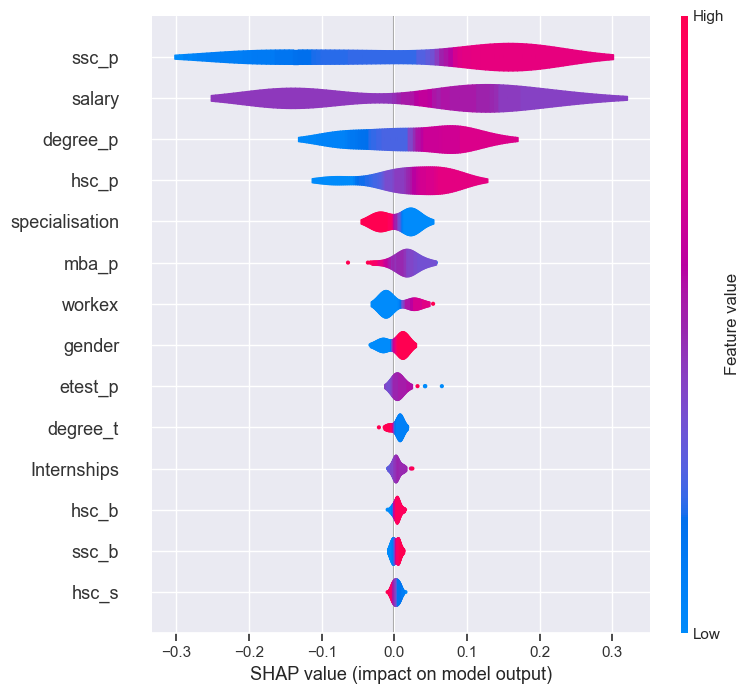

In [67]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9302325581395349')

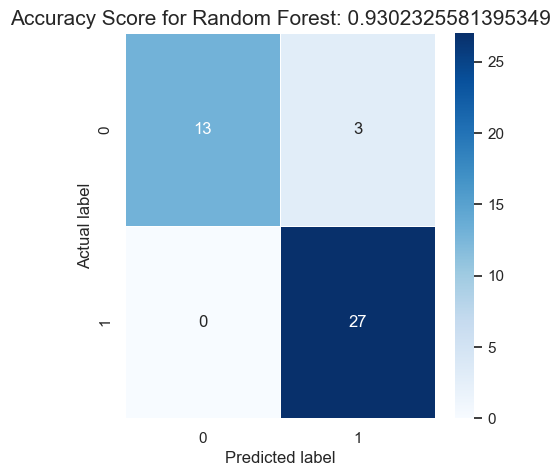

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

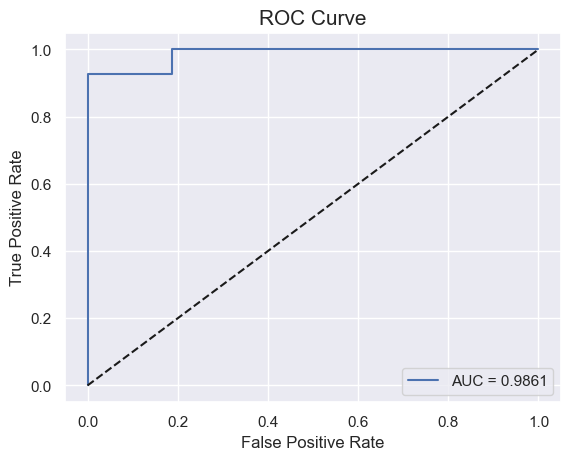

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Support Vector Classifier

In [70]:
svc = SVC()
svc.fit(X_train_processed, y_train)
y_pred = svc.predict(X_test_processed)

In [71]:
print(f"Accuracy of SVM Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision of SVM Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of SVM Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of SVM Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of SVM Model is : 0.7674418604651163
Precision of SVM Model is : 0.7741935483870968
Recall of SVM Model is : 0.8888888888888888
f1_score of SVM Model is : 0.8275862068965517


In [72]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 9  7]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.77      0.89      0.83        27

    accuracy                           0.77        43
   macro avg       0.76      0.73      0.74        43
weighted avg       0.77      0.77      0.76        43



In [73]:
cv_scores = cross_val_score(svc, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.91282051 0.83333333 0.95897436 0.93103448 0.94334975]


# DecisionTree Classifier

In [74]:
tree = DecisionTreeClassifier()
tree.fit(X_train_processed, y_train)
y_pred = tree.predict(X_test_processed)

In [75]:
print(f"Accuracy of tree Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision of tree Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of tree Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of tree Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of tree Model is : 0.9302325581395349
Precision of tree Model is : 0.9615384615384616
Recall of tree Model is : 0.9259259259259259
f1_score of tree Model is : 0.9433962264150944


In [76]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[15  1]
 [ 2 25]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.93      0.94        27

    accuracy                           0.93        43
   macro avg       0.92      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43



In [77]:
cv_scores = cross_val_score(tree, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.92820513 0.69230769 1.         0.85837438 0.85960591]


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42}


In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [80]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(metrics.accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.4 %


In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8139534883720931
Precision Score :  0.813953488372093
Recall Score :  0.813953488372093
Jaccard Score :  0.6862745098039216
Log Loss :  6.425911840614801


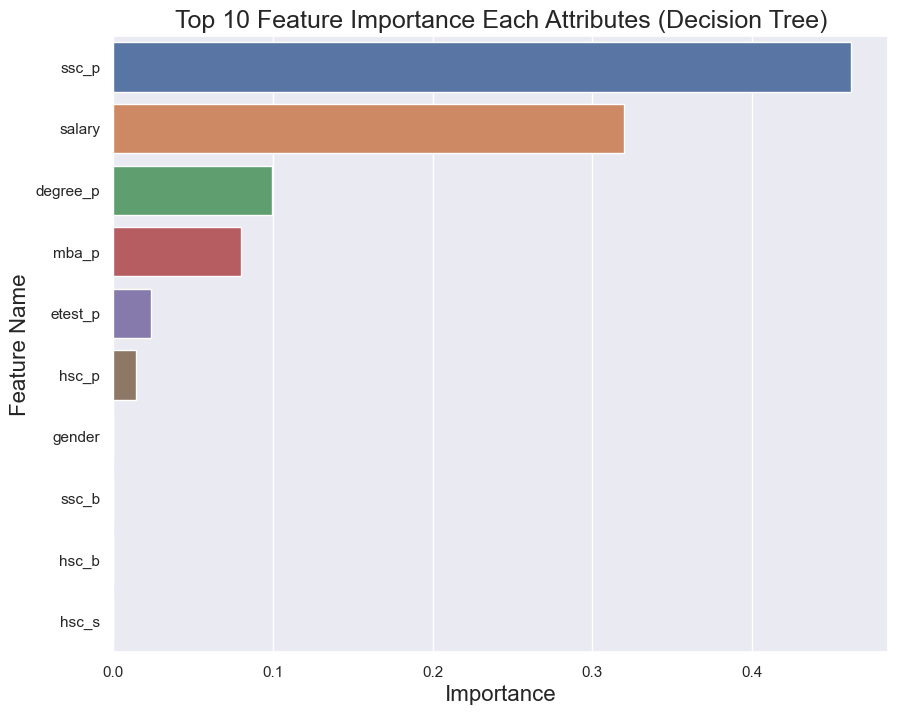

In [82]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": tree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

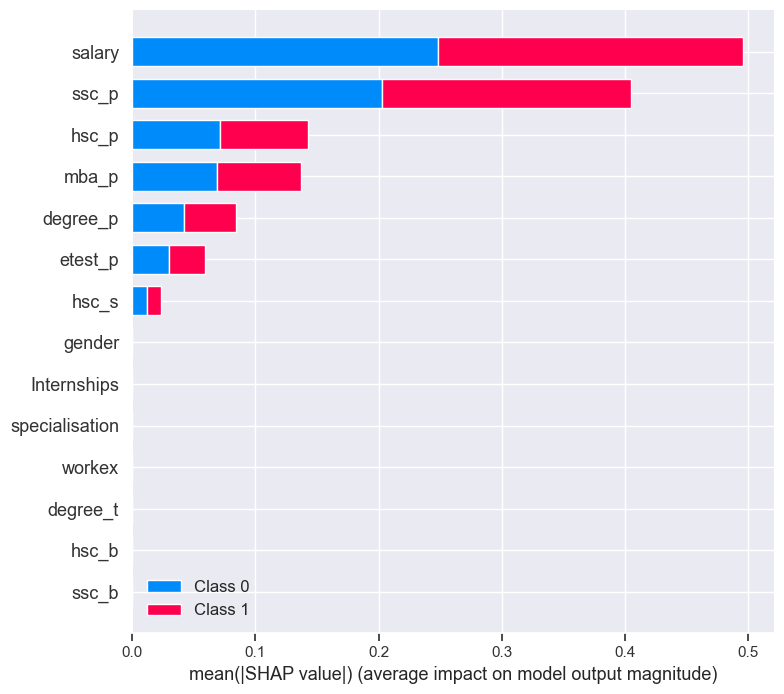

In [83]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

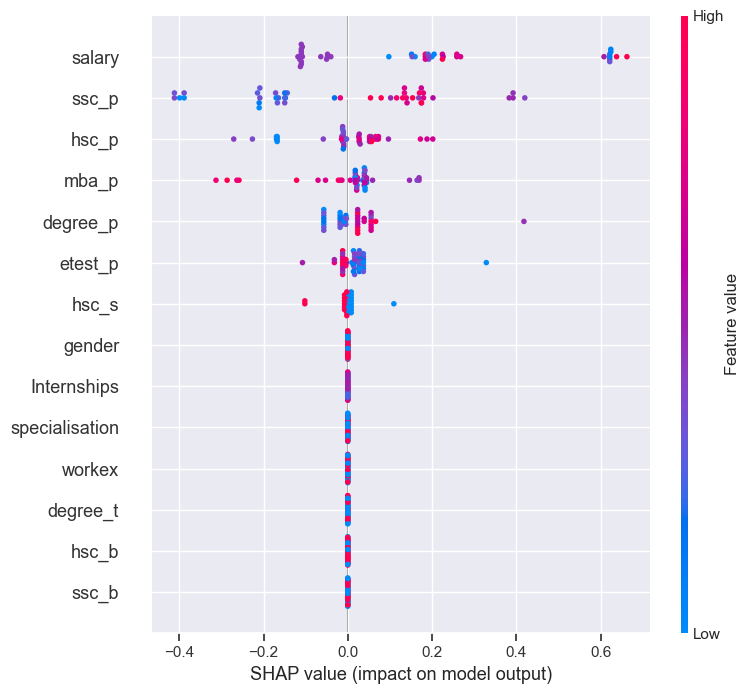

In [84]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

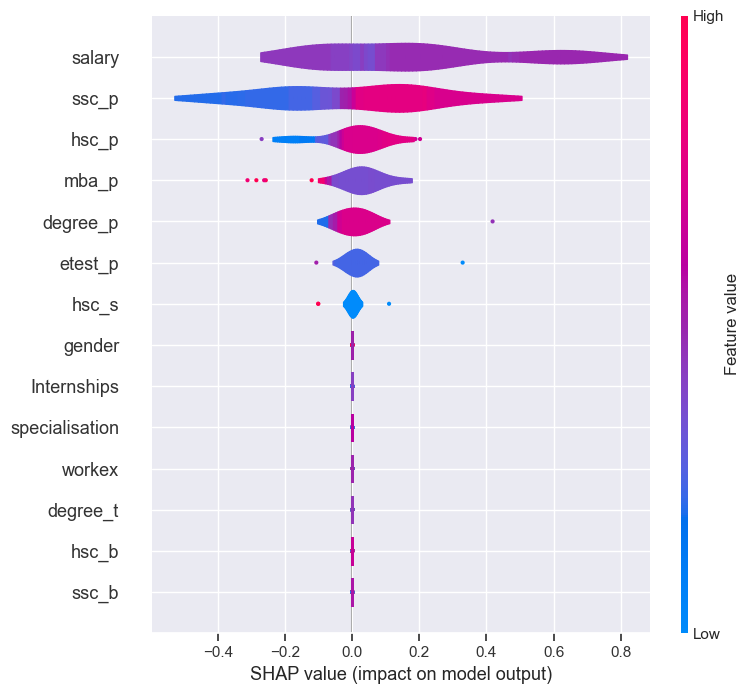

In [85]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.813953488372093')

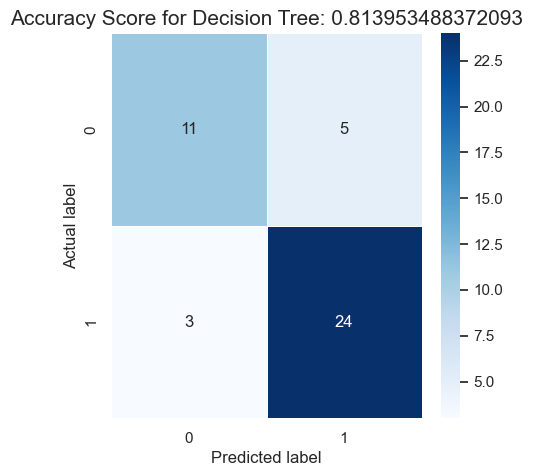

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

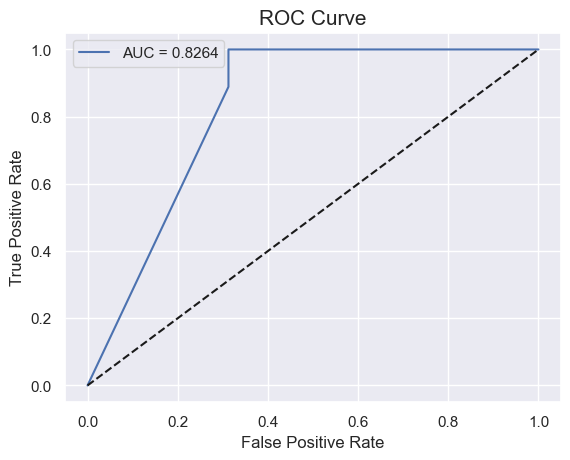

In [87]:

y_pred_proba = dtree.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# XGBoost Classifier

In [88]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train_processed, y_train)
y_pred = xgb.predict(X_test_processed)

In [89]:
print(f"Accuracy of XGB Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision of XGB Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of XGB Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of XGB Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of XGB Model is : 0.9069767441860465
Precision of XGB Model is : 1.0
Recall of XGB Model is : 0.8518518518518519
f1_score of XGB Model is : 0.92


In [90]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[16  0]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.85      0.92        27

    accuracy                           0.91        43
   macro avg       0.90      0.93      0.90        43
weighted avg       0.93      0.91      0.91        43



In [91]:
cv_scores = cross_val_score(xgb, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.98974359 0.98205128 1.         0.99507389 1.        ]


# Pickling

In [92]:
import pickle
with open('basic.pkl','wb') as f:
    pickle.dump(rfc,f)

In [93]:
model=pickle.load(open('basic.pkl','rb'))